# Import Libraries

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import GridSearchCV
# set the max columns to none
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [182]:
initial_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [183]:
df = initial_df.copy()

Columns Documentation

- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card)
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- ***Churn***: Whether the customer churned or not (Yes or No)

# EDA

In [184]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [185]:
df.shape

(7043, 21)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [187]:
df.duplicated().sum()

0

In [188]:
# I don't need the Customer ID column for my model.
df.drop('customerID', axis=1, inplace=True)

In [189]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [190]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Conclusions:
- The average customer stayed in the company is 32 months and 75% of customer has a tenure of 55 month.
- Average monthly charges are USD 64.8.

In [191]:
# check for nulls
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [192]:
df.shape

(7043, 20)

In [193]:
# machine learning models can only work with numerical values, so I will transform everything to numeric.
# TotalCharges is number but its values are in a string form so I will transform it to numeric.
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors='coerce')

In [194]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

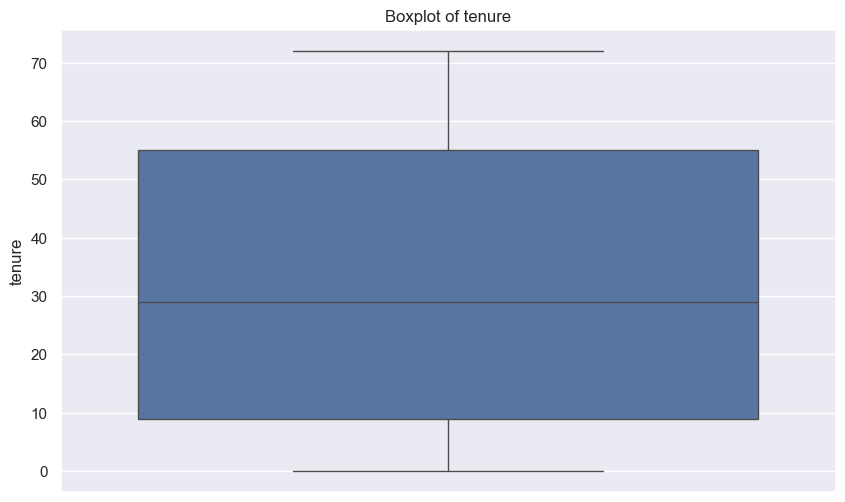

In [195]:
# check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['tenure'])
plt.title('Boxplot of tenure')
plt.show()

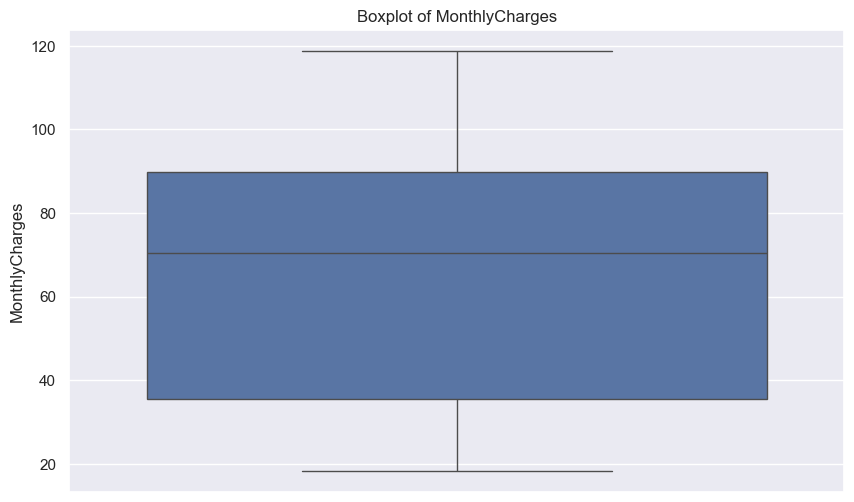

In [196]:
# check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')
plt.show()

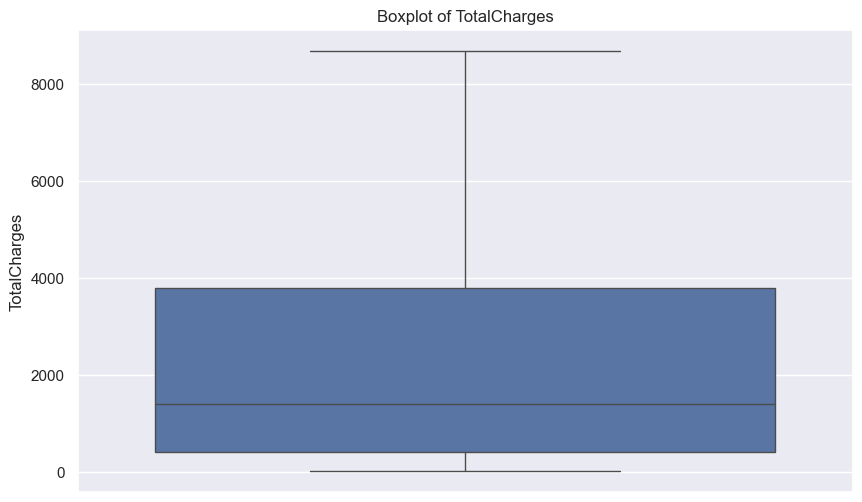

In [197]:
# check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['TotalCharges'])
plt.title('Boxplot of TotalCharges')
plt.show()

From the boxplot it seems that we doesn’t have outliers.

### Correlation Matrix
- A correlation heatmap is primarily applied to numerical values. 
- This is because the Pearson correlation coefficient (the default method used in correlation matrices) measures the linear relationship between two continuous variables.

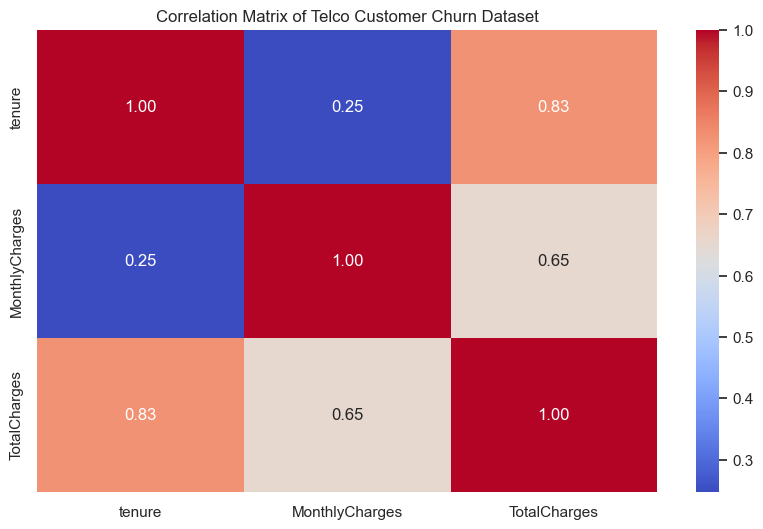

In [198]:
# check for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Telco Customer Churn Dataset")
plt.show()

- Total charges and tenure seems to be correlated (0.83). 
- Highly correlated features can reduce model performance and interpretability.
- Seems like tenure and total charges are correlated because total charges = MonthlyCharges * tenure 

## Checking the distributions

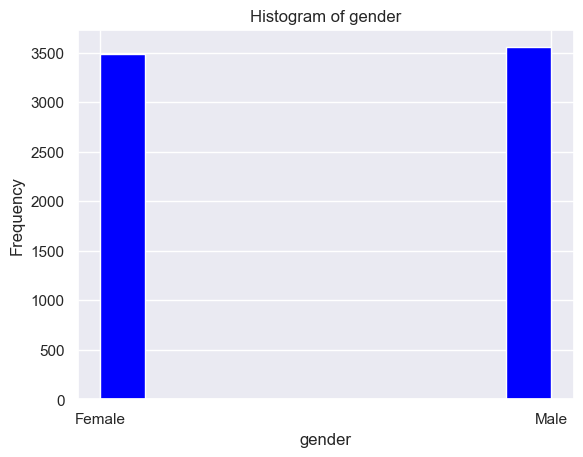

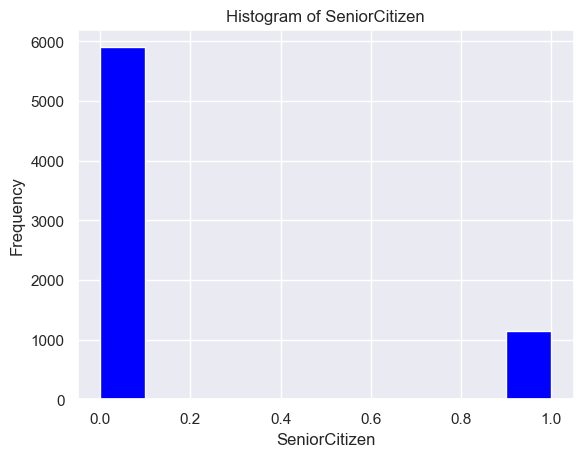

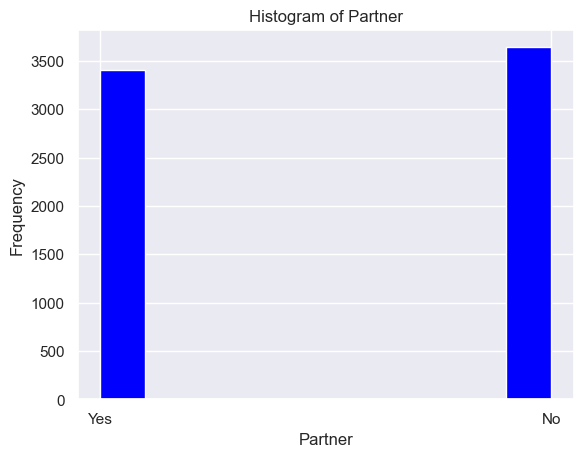

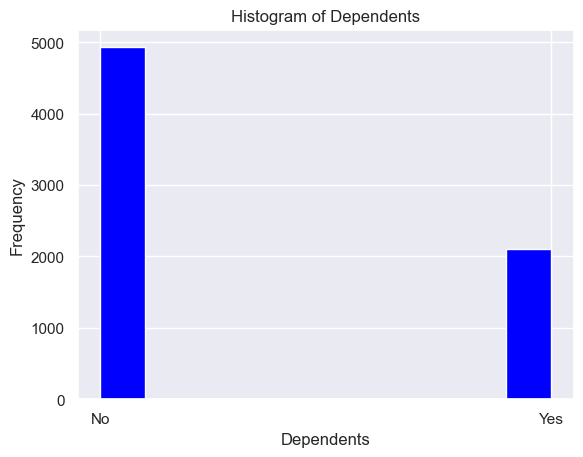

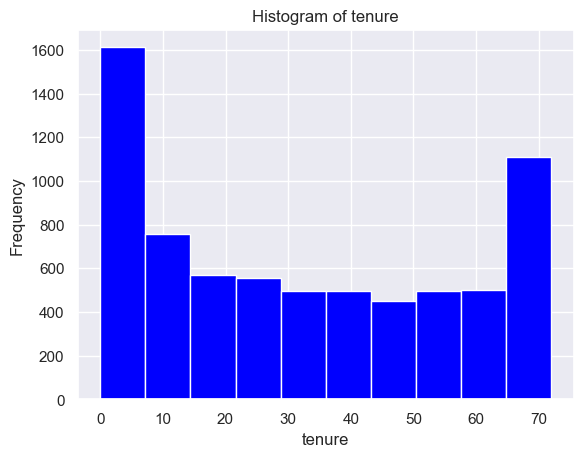

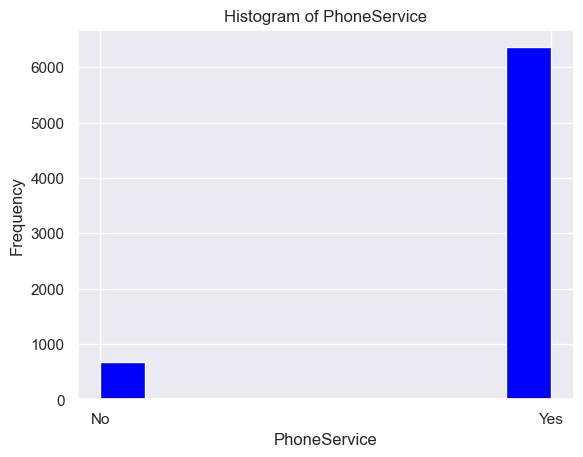

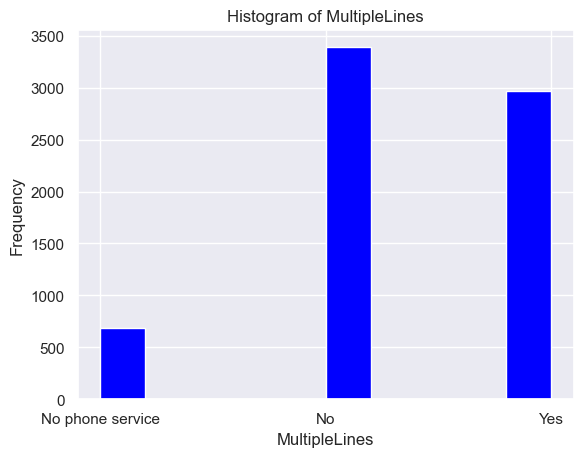

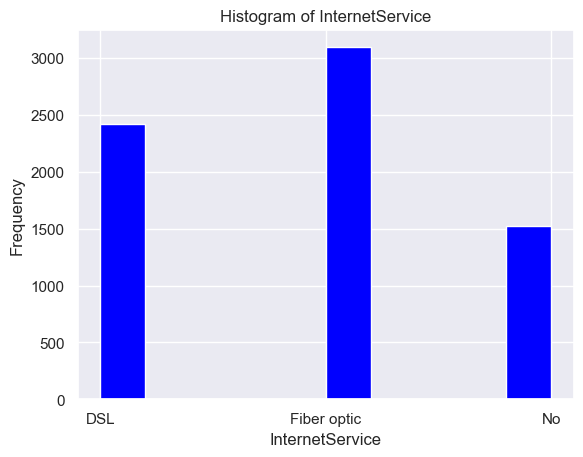

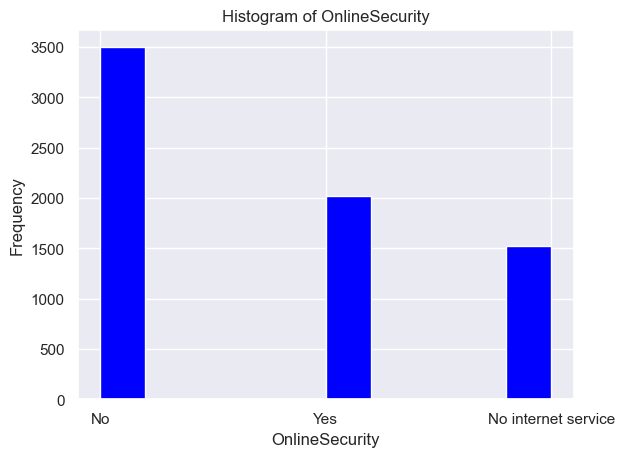

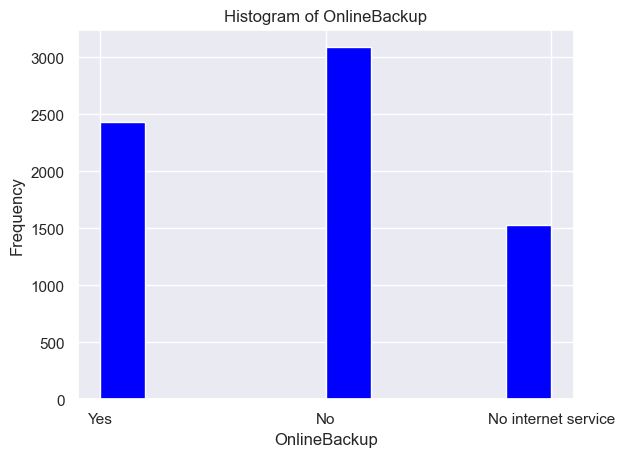

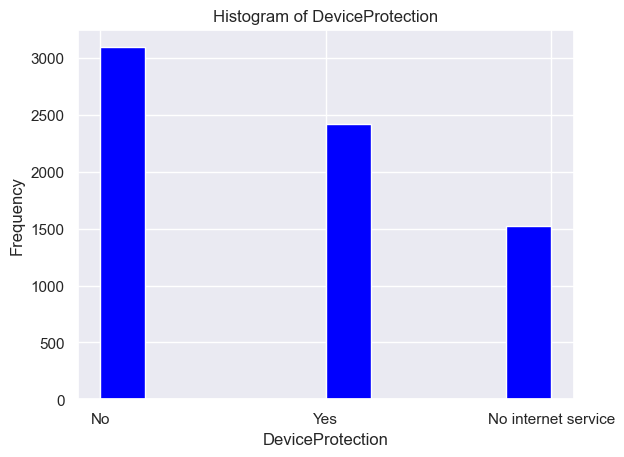

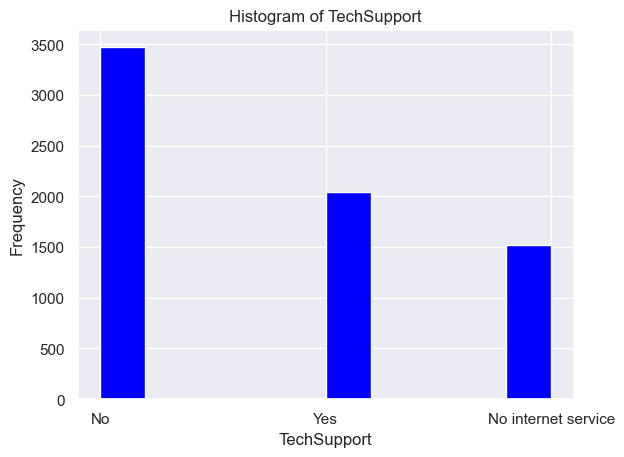

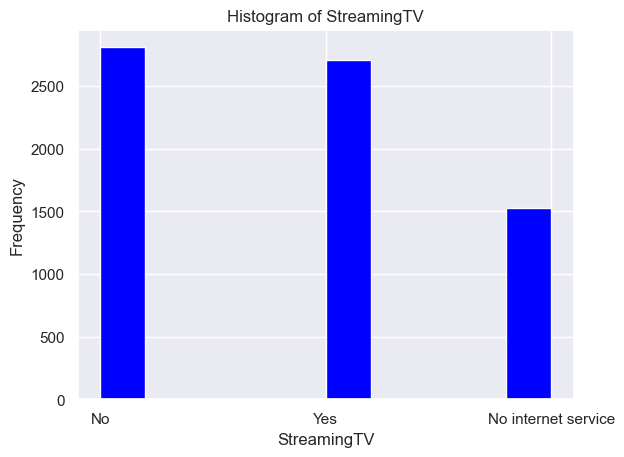

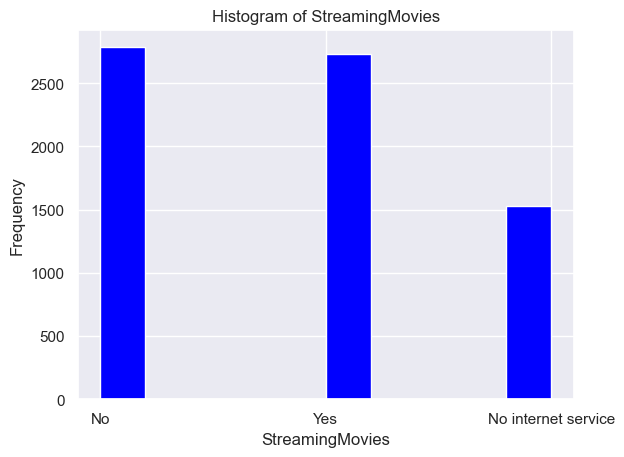

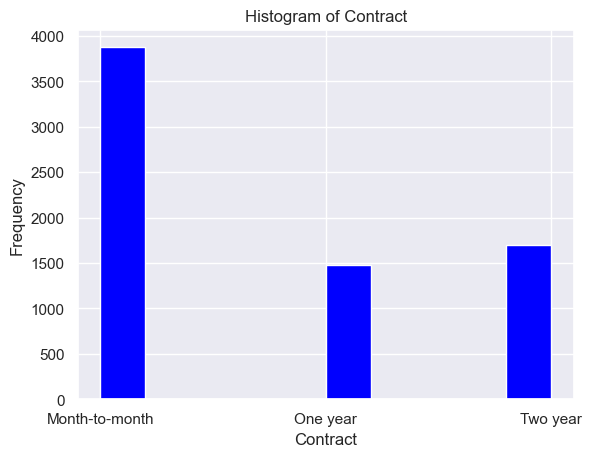

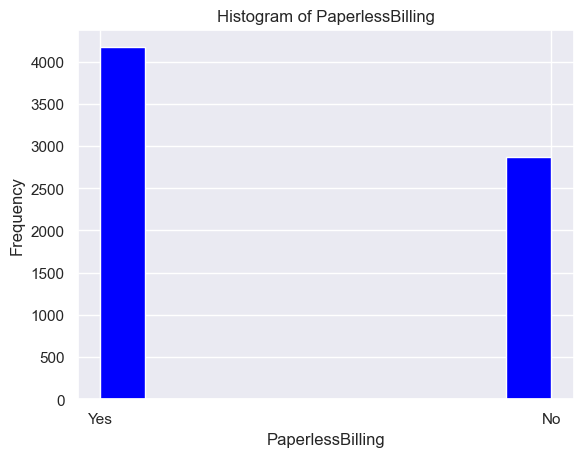

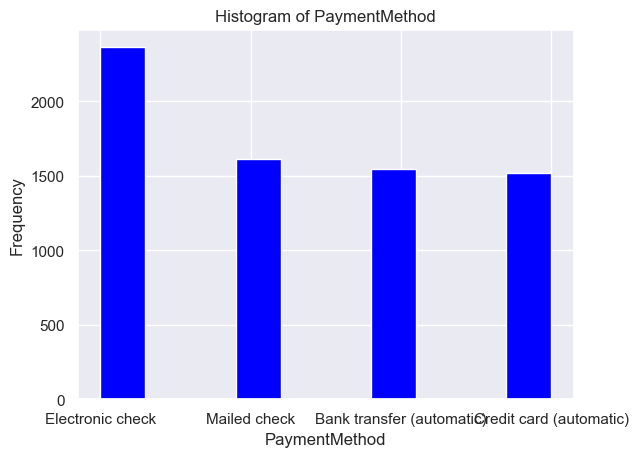

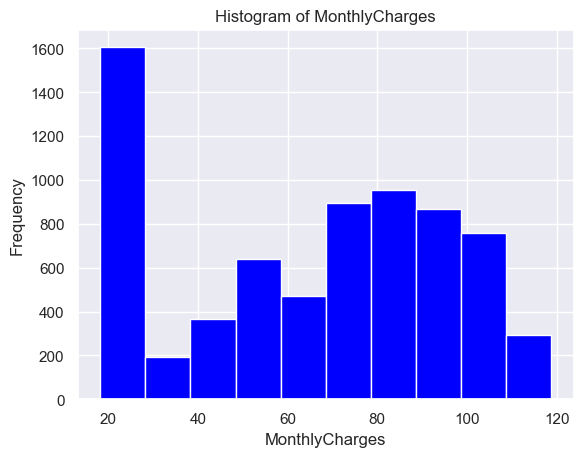

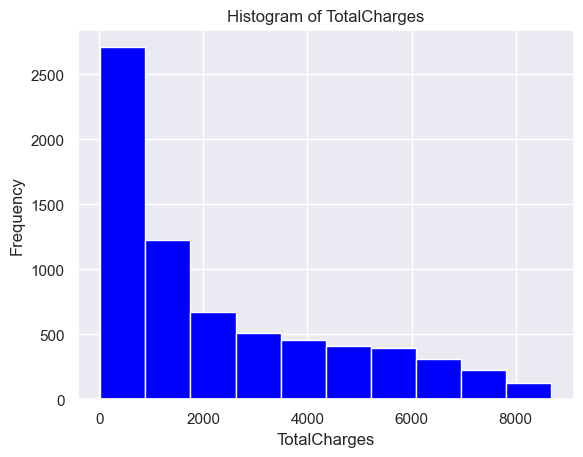

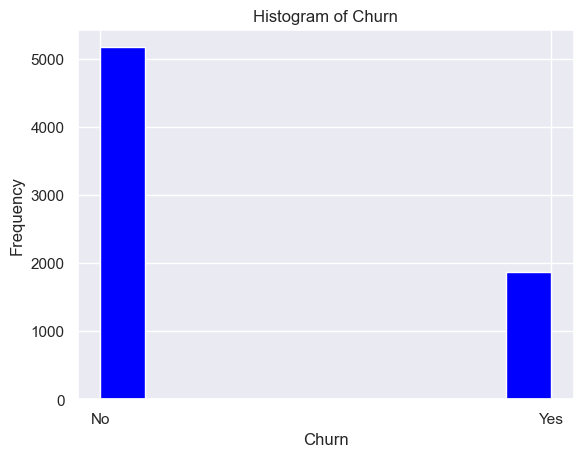

In [199]:
for column in df.columns:
    plt.figure()
    df[column].hist(bins=10, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Conlcusions:
- Churn: My dataset is unbalanced

# Feature Engineering

In [200]:
# Replace "yes" with 1 and "no" with 0
df = df.replace({'Yes': 1, 'No': 0})

In [201]:
# Replace "female" with 1 and "male" with 0
df = df.replace({'Female': 1, 'Male': 0})

In [202]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [204]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [205]:
null_values = df[df.isnull().any(axis=1)]

In [206]:
null_values.index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [207]:
null_indexes = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [208]:
initial_df.loc[null_indexes]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- So, I see that the null values that occured were missing data from the start.
- Since they are only 11 values from almost 7000 and they are values from customers that their tenure is 0 so they are new, I will just drop them out.

In [209]:
df.dropna(inplace=True)

In [210]:
df['MultipleLines'].unique()

array(['No phone service', 0, 1], dtype=object)

In [211]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [212]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [213]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [214]:
# for the rest I will use the get dummies.
ml_df = pd.get_dummies(df)

In [215]:
ml_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_No phone service,InternetService_0,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_No internet service,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1,DeviceProtection_No internet service,TechSupport_0,TechSupport_1,TechSupport_No internet service,StreamingTV_0,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,False,False,True,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,103.20,7362.90,0,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,1,29.60,346.45,0,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74.40,306.60,1,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


# Modeling

## Features, Target

In [216]:
X= ml_df.drop("Churn" , axis=1)
y= ml_df["Churn"]

## Split train,test

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

If the features are on different scales, the algorithm might give more importance to features with larger magnitudes, which can lead to worse performance.

In [218]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 1st try

## Random Forest

In [219]:
random_forest_classifier =  RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_sc, y_train)
y_pred_rfc = random_forest_classifier.predict(X_test_sc)

### Model Evaluation
- Accuracy: measures the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- Precision: measures the ratio of correctly predicted positive instances (true positives) to the total number of instances predicted as positive (true positives + false positives).
- Recall: measures the ratio of correctly predicted positive instances (true positives) to the total number of ***actual*** positive instances (true positives + false negatives).
- F1 score: the harmonic mean of precision and recall. It balances both metrics and is useful when we want to consider both false positives and false negatives.

What interests the company the most is to dectect all the churns. We don't want to lose any churn. 

If my model predict a no churn customer is not that important as to miss a churn risk. 

So, we should focus on Faulse Negative and True Possitive. We don't care so much for the False Possitive and True Negative. 

So, the best metric for this occation is the Recall because, our goal is to minimize false negatives (i.e., we don’t want to miss any true positives). ***False negatives are costly!***



In [220]:
# Model evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfc))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



We find high recall for class 0 and low recall for class 1. This means that when we are predicting 0 we are almost always correct. This usually happens when a dataset is unbalanced and the models learns to predict always the class that is found the most in the data. 

## Balance my dataset

In [221]:
ml_df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

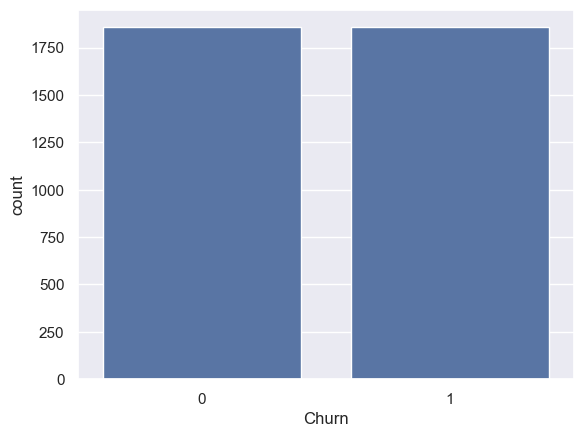

In [222]:
ml_df_2 = (ml_df.groupby('Churn', as_index=False)
        .apply(lambda x: x.sample(n=1857))
        .reset_index(drop=True))

sns.countplot(x=ml_df_2['Churn'])

In [223]:
ml_df_2.shape

(3714, 41)

## Split X,y and train, test again

In [224]:
X_balanced = ml_df_2.drop('Churn', axis=1)

y_balanced = ml_df_2['Churn']

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

## Scaling again

In [225]:
X_train_sc_bal= scaler.fit_transform(X_bal_train)
X_test_sc_bal= scaler.transform(X_bal_test)

# 2nd try

## Random Forest

In [226]:
random_forest_classifier_2 =  RandomForestClassifier()
random_forest_classifier_2.fit(X_train_sc_bal, y_bal_train)
y_pred_rfc_2 = random_forest_classifier_2.predict(X_test_sc_bal)

In [227]:
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_rfc_2))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       398
           1       0.74      0.76      0.75       345

    accuracy                           0.76       743
   macro avg       0.76      0.76      0.76       743
weighted avg       0.77      0.76      0.76       743



Now, recall metric is almost the same between class 0 and class 1. 

So, next step is to try different kind of models and find the best parameters.

## XGBoost

In [228]:
xgb_model = XGBClassifier()

In [229]:
xgb_model.fit(X_train_sc_bal, y_bal_train)
y_pred_xgb = xgb_model.predict(X_test_sc_bal)

In [230]:
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       398
           1       0.71      0.76      0.73       345

    accuracy                           0.74       743
   macro avg       0.74      0.74      0.74       743
weighted avg       0.75      0.74      0.74       743



# Logistic Regression

In [231]:
lr = LogisticRegression(random_state= 42)
lr.fit(X_train_sc_bal, y_bal_train)
y_pred_lr = lr.predict(X_test_sc_bal)

In [232]:
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       398
           1       0.74      0.80      0.76       345

    accuracy                           0.77       743
   macro avg       0.77      0.77      0.77       743
weighted avg       0.78      0.77      0.77       743



## SVMs

In [233]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train_sc_bal, y_bal_train)
y_pred_svc = svc_model.predict(X_test_sc_bal)


In [234]:
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_svc))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       398
           1       0.73      0.76      0.74       345

    accuracy                           0.76       743
   macro avg       0.76      0.76      0.76       743
weighted avg       0.76      0.76      0.76       743



# LightGBM

In [235]:
lgbm_model=LGBMClassifier(random_state=42).fit(X_train_sc_bal,y_bal_train)
y_pred_lgbm= lgbm_model.predict(X_test_sc_bal)



[LightGBM] [Info] Number of positive: 1512, number of negative: 1459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 2971, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508920 -> initscore=0.035682
[LightGBM] [Info] Start training from score 0.035682


In [236]:
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_lgbm))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76       398
           1       0.71      0.77      0.74       345

    accuracy                           0.75       743
   macro avg       0.75      0.75      0.75       743
weighted avg       0.75      0.75      0.75       743



Best performance was by logistic regression with recall 0.82 for the class 1 which I am more interested for, so I will try to improve this model.

Let's check feature importances

For logistic regression, larger absolute values of coefficients indicate more important features.

In [237]:
# Get feature importance (coefficients)
importance = np.abs(lr.coef_[0])
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

In [238]:
feature_importance

,Feature,Importance
4,tenure,0.990940
7,MonthlyCharges,0.360754
35,Contract_Two year,0.317832
8,TotalCharges,0.303985
33,Contract_Month-to-month,0.298099
14,InternetService_Fiber optic,0.289902
13,InternetService_DSL,0.252709
1,SeniorCitizen,0.168786
6,PaperlessBilling,0.149336
28,StreamingTV_1,0.140656


In [239]:
# Sort feature importances in descending order
'''indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_bal_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()'''

'indices = np.argsort(importances)[::-1]\n\n# Rearrange feature names so they match the sorted feature importances\nnames = [X_bal_train.columns[i] for i in indices]\n\n# Create plot\nplt.figure(figsize=(10, 6))\nplt.title("Feature Importances")\nplt.bar(range(X.shape[1]), importances[indices])\nplt.xticks(range(X.shape[1]), names, rotation=90)\nplt.xlabel("Features")\nplt.ylabel("Importance")\nplt.show()'

In [240]:
'''# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_bal_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)'''

"# Create a DataFrame\nimportance_df = pd.DataFrame({\n    'Feature': X_bal_train.columns,\n    'Importance': importances\n})\n\n# Sort the DataFrame by importance (descending order)\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)"

In [241]:
#importance_df['Feature'].head(10).values

### Let's try with top 10 features

In [242]:
'''selected_columns = ['MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling',
       'PaymentMethod_Electronic check', 'Contract_One year',
       'OnlineSecurity_0', 'SeniorCitizen', 'OnlineBackup_0',
       'StreamingTV_0' ]

X_train_fi= X_bal_train[selected_columns]'''

"selected_columns = ['MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling',\n       'PaymentMethod_Electronic check', 'Contract_One year',\n       'OnlineSecurity_0', 'SeniorCitizen', 'OnlineBackup_0',\n       'StreamingTV_0' ]\n\nX_train_fi= X_bal_train[selected_columns]"

In [243]:
feature_importance.head(10)

,Feature,Importance
4,tenure,0.990940
7,MonthlyCharges,0.360754
35,Contract_Two year,0.317832
8,TotalCharges,0.303985
33,Contract_Month-to-month,0.298099
14,InternetService_Fiber optic,0.289902
13,InternetService_DSL,0.252709
1,SeniorCitizen,0.168786
6,PaperlessBilling,0.149336
28,StreamingTV_1,0.140656


In [244]:
selected_columns=['tenure','MonthlyCharges','TotalCharges','InternetService_Fiber optic','Contract_Two year','InternetService_DSL',
                  'Contract_Month-to-month','StreamingMovies_1','PaperlessBilling','SeniorCitizen']
                  

In [245]:
X_train_fi= X_bal_train[selected_columns]

In [246]:
X_train_fi

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,Contract_Two year,InternetService_DSL,Contract_Month-to-month,StreamingMovies_1,PaperlessBilling,SeniorCitizen
2498,24,101.05,2391.80,True,False,False,True,True,1,0
1966,5,81.30,416.30,True,False,False,True,False,1,0
596,17,19.35,307.00,False,False,False,False,False,0,0
1694,37,96.10,3646.80,True,False,False,True,True,1,0
3400,12,89.40,1095.65,True,False,False,True,True,1,0
...,...,...,...,...,...,...,...,...,...,...
1130,50,106.80,5347.95,True,False,False,False,True,1,1
1294,37,91.20,3247.55,True,False,False,False,True,0,0
860,1,74.30,74.30,True,False,False,True,False,1,0
3507,26,91.25,2351.80,True,False,False,True,True,1,1


In [247]:
X_test_fi = X_bal_test[selected_columns]

## Scaling again

In [248]:
X_train_sc_fi= scaler.fit_transform(X_train_fi)
X_test_sc_fi= scaler.transform(X_test_fi)

## Logistic Regression

In [249]:
lr_2=LogisticRegression(random_state=42).fit(X_train_sc_fi,y_bal_train)
y_pred_lr_2= lr_2.predict(X_test_sc_fi)

In [250]:
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_lr_2))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       398
           1       0.70      0.79      0.74       345

    accuracy                           0.75       743
   macro avg       0.75      0.75      0.75       743
weighted avg       0.75      0.75      0.75       743



Recall for borh 0 and 1 predictions is very close to the recall when all 40 features were included. So we prefer this model beacuse it is only using 10 features and brings us a very similar recall.

## Grid Search

Core Logistic Regression Parameters

- penalty (regularization type)

    - 'l1' (Lasso regularization): Encourages sparsity by driving some coefficients to exactly zero

    - 'l2' (Ridge regularization): Default, shrinks coefficients evenly

    - 'elasticnet': Combination of L1 and L2 (requires solver='saga')

    - None: No regularization

- C (inverse of regularization strength)

    - Smaller values specify stronger regularization

    - Typical range: [0.001, 0.01, 0.1, 1, 10, 100]

    - Example: C=0.1 means stronger regularization than C=1

- solver (optimization algorithm)

    - 'newton-cg', 'lbfgs', 'sag', 'saga': For L2 or no penalty

    - 'liblinear', 'saga': For L1 penalty

    - 'saga': The only one that supports elasticnet

- class_weight (handling imbalanced classes)

    - None: All classes have weight 1

    - 'balanced': Automatically adjusts weights inversely proportional to class frequencies

    - Dictionary: Custom weights like {0: 1, 1: 2}

In [251]:

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # Required for elasticnet and l1
    'class_weight': [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}], 
    'max_iter': [500, 1000],  # Increased for complex searches
    'l1_ratio': [0.1, 0.5, 0.9]  # Only used with elasticnet
}

# Create grid search with recall scoring
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,  # Stratified 5-fold CV
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=2,  # Detailed output
    refit=True  # Refit best model on full training data
)

# Fit on pre-scaled training data
grid_search.fit(X_train_sc_fi, y_bal_train)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Test set evaluation
best_model = grid_search.best_estimator_
y_pred_lr_grid = best_model.predict(X_test_sc_fi)
test_accuracy = accuracy_score(y_bal_test, y_pred_lr_grid)
print("\nTest Set Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_lr_grid))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best CV Accuracy: 0.7643923832159126

Test Set Accuracy: 0.7402422611036339

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       398
           1       0.69      0.79      0.74       345

    accuracy                           0.74       743
   macro avg       0.74      0.74      0.74       743
weighted avg       0.75      0.74      0.74       743



### I will now try without tenure column since it is highly correlated with Total Charges.

In [252]:
X_train_fi_2 = X_train_fi.drop('tenure', axis=1)

In [253]:
X_train_fi_2

,MonthlyCharges,TotalCharges,InternetService_Fiber optic,Contract_Two year,InternetService_DSL,Contract_Month-to-month,StreamingMovies_1,PaperlessBilling,SeniorCitizen
2498,101.05,2391.80,True,False,False,True,True,1,0
1966,81.30,416.30,True,False,False,True,False,1,0
596,19.35,307.00,False,False,False,False,False,0,0
1694,96.10,3646.80,True,False,False,True,True,1,0
3400,89.40,1095.65,True,False,False,True,True,1,0
...,...,...,...,...,...,...,...,...,...
1130,106.80,5347.95,True,False,False,False,True,1,1
1294,91.20,3247.55,True,False,False,False,True,0,0
860,74.30,74.30,True,False,False,True,False,1,0
3507,91.25,2351.80,True,False,False,True,True,1,1


In [254]:
X_test_fi_2 = X_test_fi.drop('tenure', axis=1)

## Scaling again

In [255]:
X_train_sc_fi_2= scaler.fit_transform(X_train_fi_2)
X_test_sc_fi_2= scaler.transform(X_test_fi_2)

In [256]:
X_train_sc_fi_2

array([[ 1.13745187,  0.16617069,  0.947841  , ...,  1.20807164,
         0.74367871, -0.47130755],
       [ 0.45767969, -0.73801281,  0.947841  , ..., -0.82776548,
         0.74367871, -0.47130755],
       [-1.67456773, -0.78803927, -1.05502927, ..., -0.82776548,
        -1.3446667 , -0.47130755],
       ...,
       [ 0.21674778, -0.89454572,  0.947841  , ..., -0.82776548,
         0.74367871, -0.47130755],
       [ 0.80014719,  0.14786275,  0.947841  , ...,  1.20807164,
         0.74367871,  2.12175678],
       [ 0.72442574, -0.39334291,  0.947841  , ...,  1.20807164,
         0.74367871,  2.12175678]])

## Grid Search again

In [259]:
# Define parameter grid
param_grid_2 = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # Required for elasticnet and l1
    'class_weight': [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}], 
    'max_iter': [500, 1000],  # Increased for complex searches
    'l1_ratio': [0.1, 0.5, 0.9]  # Only used with elasticnet
}

# Create grid search with recall scoring
grid_search_2 = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_2,
    cv=5,  # Stratified 5-fold CV
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=2,  # Detailed output
    refit=True  # Refit best model on full training data
)

# Fit on pre-scaled training data
grid_search_2.fit(X_train_sc_fi_2, y_bal_train)

# Evaluation
print("Best Parameters:", grid_search_2.best_params_)
print("Best CV Accuracy:", grid_search_2.best_score_)

# Test set evaluation
best_model_2 = grid_search_2.best_estimator_
y_pred_lr_grid_2 = best_model_2.predict(X_test_sc_fi_2)
test_accuracy_2 = accuracy_score(y_bal_test, y_pred_lr_grid)
print("\nTest Set Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_bal_test, y_pred_lr_grid_2))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'C': 1, 'class_weight': None, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy: 0.758667911609088

Test Set Accuracy: 0.7402422611036339

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       398
           1       0.70      0.79      0.74       345

    accuracy                           0.75       743
   macro avg       0.75      0.75      0.75       743
weighted avg       0.75      0.75      0.75       743



The result is the same so it didn't help my model.